<div style="background-color: lightgreen; color: black; display: flex; align-items: center; position: relative;">
  <img src="https://blockchainclimate.org/wp-content/uploads/2020/11/cropped-BCI_Logo_LR.png" alt="BCI Logo" width="200">
  <h1 style="margin: 0 0 0 400px; font-weight: bold;">Energy Market Analysis Data</h1>
  <h5 style="position: absolute; bottom: 0; right: 0; margin: 0;">Willian Pina</h5>
</div>

---


<div style="background-color: #f5f5dc; color: black;">

## Introduction

This briefing is prepared to analyze the energy market, focusing on renewable energy sources like wind and solar power. The analysis is crucial for supporting blockchain-based technical assistance projects under the Blockchain Climate Institute (BCI) and is based on data from the UN Energy Statistics Database and the UNSD Annual Questionnaire on Energy Statistics.

## Objectives

The objectives of this briefing, as assigned by the Director of Research (Finance) (DRS1) for the Director-General (DG), are to provide insights on:

1. **Global Trends in Renewable Energy Production**:
   - Identifying trends in wind and solar energy production on a global scale.
   - Determining the countries that are leading in the adoption of these renewable sources.

2. **Energy Market Analysis in the United Kingdom**:
   - Examining specific trends within the UK's energy market.
   - Analyzing significant shifts in energy categories and flow patterns.

3. **Forecasting Future Energy Production Metrics**:
   - Projecting future trends in wind and solar energy production globally and in the UK up to 2030.

4. **Energy Clustering Analysis**:
   - Grouping countries based on their energy mix and production metrics.
   - Identifying countries that are similar in terms of their energy production.

5. **Substantial Changes in Categories**:
   - Identifying significant changes in energy categories and flow patterns in the UK.
   
6. **Data Quality Assessment and Insight Extraction**:
   - Assessing the quality of the available dataset and identifying potential issues.
   - Extracting valuable insights that could be beneficial to stakeholders involved in the briefing.

## Methodologies

To address these objectives, the following methodologies will be applied:
- Statistical analysis and data visualization to observe global trends in wind and solar energy.
- Machine learning techniques, like K-means clustering, to group countries based on their energy mix.
- Time series analysis and predictive modeling to forecast future energy trends.
- Comprehensive data quality assessment to ensure the robustness of our analysis.

## Proposed Solution

The briefing will include:
- A comprehensive report detailing current trends in wind and solar energy globally and in the UK.
- An interactive dashboard showcasing these trends and predictions.
- Strategic recommendations based on the analysis, aiding in the development of blockchain-based projects.

## Conclusion

This briefing aims to provide the BCI leadership with actionable insights into the renewable energy market, underpinning the development of sustainable finance projects. The analysis and forecasts presented will play a critical role in shaping effective strategies for the adoption and promotion of renewable energy sources.
</div>

---

<div style="background-color: lightgreen; border-radius: 10px; text-align: center;">
  <h1 style="font-weight: bold; color: black;">
    SETUP
  </h1>
</div>



In [1]:
import os
import zipfile


# Configuration Class
class CONFIG:
    data_wind     = 'raw_data/UNdata_wind_production.csv'
    data_solar    = 'raw_data/UNdata_solar_production.csv'
    data_simple   = 'data/data.csv'
    data_larger   = 'data/combined_data.csv'

# Installing and Importing Necessary Libraries
required_libraries = ["pandas", "matplotlib", "numpy", "sklearn", "statsmodels", "tqdm", "seaborn"]
for library in required_libraries:
    try:
        __import__(library)
        print(f"Library '{library}' is already installed.")
    except ModuleNotFoundError:
        print(f"Library '{library}' not found. Installing...")
        os.system(f"pip install {library}")

# Importing the libraries after verification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Silencing all warnings
warnings.filterwarnings('ignore')

# Loading and Merging Solar and Wind Energy Datasets
solar_df = pd.read_csv(CONFIG.data_solar)
wind_df = pd.read_csv(CONFIG.data_wind)
merged_data = pd.merge(solar_df, wind_df, on=['Country or Area', 'Year'], how='inner', suffixes=('_solar', '_wind'))
merged_data = merged_data[['Country or Area', 'Year', 'Quantity_solar', 'Quantity_wind']]
merged_data.dropna(inplace=True)
merged_data['Year'] = merged_data['Year'].astype(int)
merged_data.to_csv(CONFIG.data_simple, index=False)

# Unzipping ZIP Files
zip_directory = 'DOWNLOADED'
extraction_directory = 'DOWNLOADED/extracted'
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)
    print(f"Created directory: {extraction_directory}")

print("\nExtracting ZIP files...")
extracted_files = []
for file_name in tqdm(os.listdir(zip_directory)):
    file_path = os.path.join(zip_directory, file_name)
    if zipfile.is_zipfile(file_path):
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extraction_directory)
            extracted_files.extend([os.path.join(extraction_directory, f) for f in zip_ref.namelist()])

print("\nExtracted files:", extracted_files)

# Reading and Combining CSV DataFrames
print("\nReading CSV files and combining data...")
dataframes = []
for csv_file in tqdm(extracted_files):
    if csv_file.endswith('.csv'):
        df = pd.read_csv(csv_file)
        dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.dropna(inplace=True)
combined_df['Year'] = combined_df['Year'].astype(int)

# Saving the Combined DataFrame
combined_csv_path = 'data/combined_data.csv'
combined_df.to_csv(combined_csv_path, index=False)


Library 'pandas' is already installed.
Library 'matplotlib' is already installed.
Library 'numpy' is already installed.
Library 'sklearn' is already installed.
Library 'statsmodels' is already installed.
Library 'tqdm' is already installed.
Library 'seaborn' is already installed.

Extracting ZIP files...


100%|██████████| 75/75 [00:01<00:00, 39.60it/s]



Extracted files: ['DOWNLOADED/extracted/UNdata_Export_20231224_120523796.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120606383.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120620161.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120630830.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120643777.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120655400.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120706848.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120717313.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120733126.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120744233.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120756267.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120807920.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120845254.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120859591.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120922445.csv', 'DOWNLOADED/extracted/UNdata_Export_20231224_120937315.csv', 'DOWN

100%|██████████| 74/74 [00:01<00:00, 41.86it/s]


<div style="background-color: lightgreen; border-radius: 10px; text-align: center;">
  <h1 style="font-weight: bold; color: black;">
Global Trends in Renewable Energy Production </h1>
</div>


<div style="background-color: #f5f5dc; color: black;">

In recent years, the shift towards renewable energy sources has become a pivotal aspect of global environmental and economic policies. This analysis delves into the evolving dynamics of the renewable energy sector, with a specific focus on solar and wind energy production. We explore global trends, highlight the specific context of the United Kingdom, and project future developments up to the year 2030.

Our data spans from **1990 to 2021**, offering a comprehensive view of the progress and potential growth in these renewable energy sectors. Through this analysis, we aim to provide valuable insights for policymakers, industry stakeholders, and environmental advocates, facilitating informed decisions in the journey towards a more sustainable and energy-efficient future.

</div>

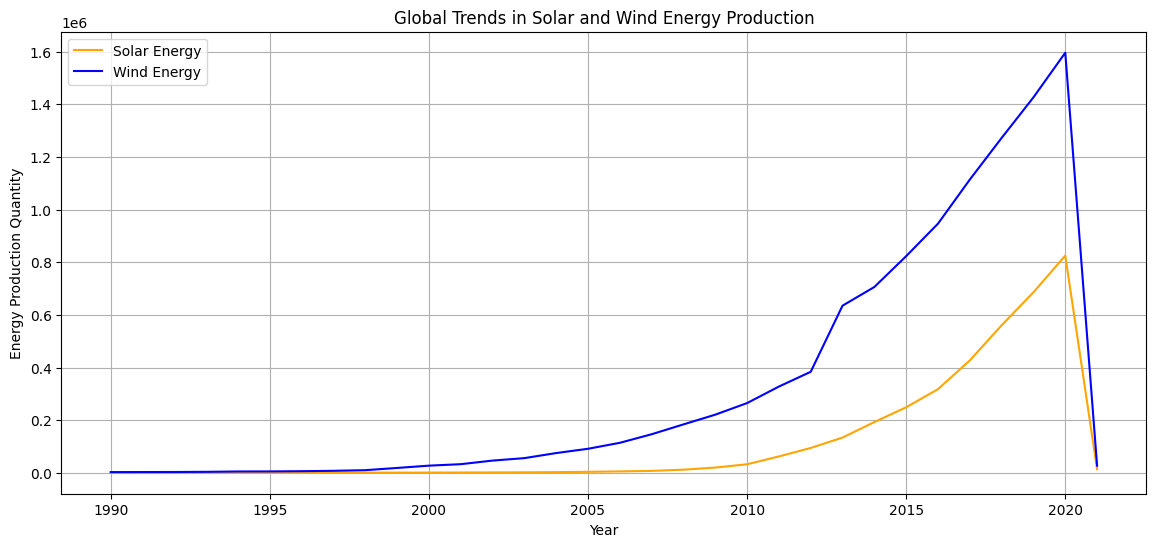

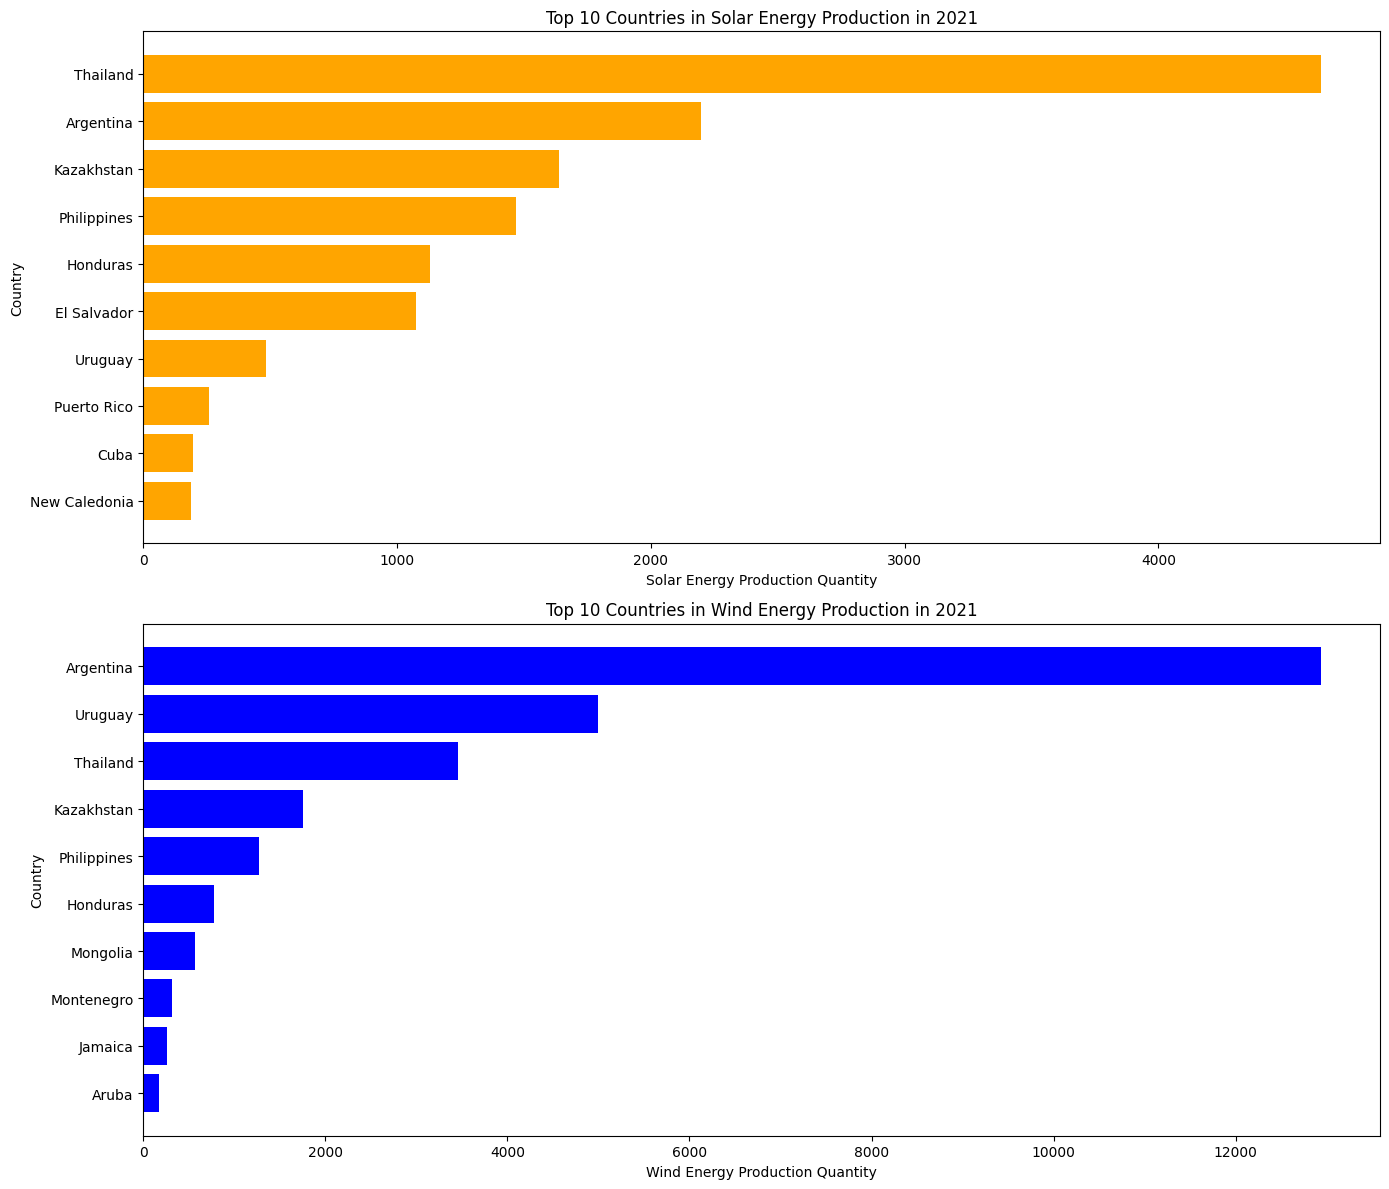

In [2]:
data = pd.read_csv(CONFIG.data_simple)
# Grouping data by year to see the global trend
grouped_data = data.groupby('Year').sum(numeric_only=True)

# Plotting the trends
plt.figure(figsize=(14, 6))

plt.plot(grouped_data.index, grouped_data['Quantity_solar'], label='Solar Energy', color='orange')
plt.plot(grouped_data.index, grouped_data['Quantity_wind'], label='Wind Energy', color='blue')

plt.title('Global Trends in Solar and Wind Energy Production')
plt.xlabel('Year')
plt.ylabel('Energy Production Quantity')
plt.legend()
plt.grid(True)

plt.show()

# Identifying the top countries in terms of solar and wind energy production
# For the most recent year in the dataset
latest_year = data['Year'].max()
top_countries_solar = data[data['Year'] == latest_year].sort_values(by='Quantity_solar', ascending=False).head(10)
top_countries_wind = data[data['Year'] == latest_year].sort_values(by='Quantity_wind', ascending=False).head(10)

# Creating bar plots for the top countries in solar and wind energy production for the latest year

plt.figure(figsize=(14, 12))

# Solar Energy Production
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
top_countries_solar_sorted = top_countries_solar.sort_values(by='Quantity_solar', ascending=True)
plt.barh(top_countries_solar_sorted['Country or Area'], top_countries_solar_sorted['Quantity_solar'], color='orange')
plt.title(f'Top 10 Countries in Solar Energy Production in {latest_year}')
plt.xlabel('Solar Energy Production Quantity')
plt.ylabel('Country')

# Wind Energy Production
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
top_countries_wind_sorted = top_countries_wind.sort_values(by='Quantity_wind', ascending=True)
plt.barh(top_countries_wind_sorted['Country or Area'], top_countries_wind_sorted['Quantity_wind'], color='blue')
plt.title(f'Top 10 Countries in Wind Energy Production in {latest_year}')
plt.xlabel('Wind Energy Production Quantity')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


<div style="background-color: #f5f5dc; color: black;">

### Global Trends in Solar and Wind Energy Production

The analysis of the dataset reveals the following trends:

1. **Solar Energy Production**: There has been a significant increase in global solar energy production over the years. The trend shows a steady and substantial rise, indicating a growing adoption of solar energy worldwide.

2. **Wind Energy Production**: Wind energy production also shows an increasing trend, although with some fluctuations. Overall, it indicates a positive growth in the utilization of wind energy globally.

### Leading Countries in Solar and Wind Energy Production in 2021

For the year 2021, the top countries in terms of solar and wind energy production are:

- **Top Countries for Solar Energy Production**:
    1. Thailand - 4641.130 units
    2. Argentina - 2196.000 units
    3. Kazakhstan - 1636.500 units
    4. Philippines - 1469.500 units
    5. Honduras - 1128.681 units
    6. El Salvador - 1074.460 units
    7. Uruguay - 483.808 units
    8. Puerto Rico - 260.000 units
    9. Cuba - 196.100 units
    10. New Caledonia - 187.600 units

- **Top Countries for Wind Energy Production**:
    1. Argentina - 12938.000 units
    2. Uruguay - 4991.596 units
    3. Thailand - 3462.430 units
    4. Kazakhstan - 1758.000 units
    5. Philippines - 1269.700 units
    6. Honduras - 774.662 units
    7. Mongolia - 567.639 units
    8. Montenegro - 320.100 units
    9. Jamaica - 257.806 units
    10. Aruba - 172.000 units

These findings highlight the countries that are leading in the adoption of renewable energy sources, specifically solar and wind energy, as of 2021.

</div>

---

<div style="background-color: lightgreen; border-radius: 10px; text-align: center;">
  <h1 style="font-weight: bold; color: black;">
Energy Market Analysis in the United Kingdom
</h1>
</div>


<div style="background-color: #f5f5dc; color: black;">

The United Kingdom's energy market has undergone significant transformations in recent years, driven by a global push towards sustainability, technological advancements, and policy changes. This sector is characterized by its dynamic nature, responding to both national and international trends in energy consumption, production, and environmental impact.

In analyzing the UK's energy market, it's important to examine specific trends that highlight how energy consumption and production patterns have shifted over time. This includes looking at different energy categories such as fossil fuels, nuclear energy, renewables, and their flow patterns within the market. By dissecting these trends and shifts, we can gain insights into the UK's energy landscape, its progress towards sustainable energy sources, and how it aligns with global energy objectives.

To provide a detailed analysis, I will execute codes that will help us understand these specific trends and significant shifts in the UK's energy market. Let's start by loading and examining the relevant data.

The dataset includes data on solar and wind energy production in the United Kingdom from 2016 to 2020. To analyze specific trends within the UK's energy market, particularly in the context of solar and wind energy, we'll:

1. **Examine Trends in Solar and Wind Energy Production**: This involves analyzing the annual production quantities of solar and wind energy in the UK over these years.

2. **Analyze Shifts in Energy Categories**: We'll look at how the balance between solar and wind energy production has evolved, indicating shifts in the focus of renewable energy strategies in the UK.


</div

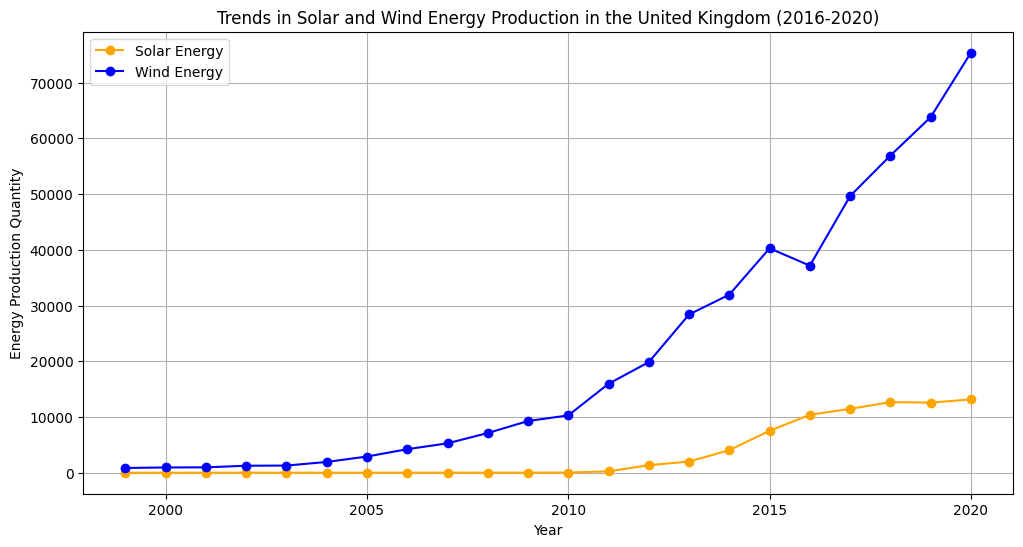

In [3]:
# Plotting the trends in solar and wind energy production in the UK

# Filtering the dataset for the United Kingdom for UK-specific analysis
uk_data = data[data['Country or Area'] == 'United Kingdom']

plt.figure(figsize=(12, 6))

plt.plot(uk_data['Year'], uk_data['Quantity_solar'], label='Solar Energy', marker='o', color='orange')
plt.plot(uk_data['Year'], uk_data['Quantity_wind'], label='Wind Energy', marker='o', color='blue')

plt.title('Trends in Solar and Wind Energy Production in the United Kingdom (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Energy Production Quantity')
plt.legend()
plt.grid(True)

plt.show()


<div style="background-color: #f5f5dc; color: black;">

The chart illustrates the trends in solar and wind energy production in the United Kingdom from 2016 to 2020. Key observations include:

1. **Solar Energy**: There is a gradual increase in solar energy production over the years. The trend indicates a consistent, albeit moderate, growth in the utilization of solar energy.

2. **Wind Energy**: Wind energy production shows a more pronounced increase. There is a significant and steady rise in wind energy production, suggesting a strong emphasis and successful expansion in this sector.

These trends indicate that while both solar and wind energy have been growing, the UK has seen a more substantial increase in wind energy production. This could be attributed to factors such as favorable geographic conditions, policy support, and technological advancements in the wind energy sector. This analysis highlights the UK's commitment to diversifying its energy mix and increasing reliance on renewable energy sources.

</div>

<div style="background-color: lightgreen; border-radius: 10px; text-align: center;">
  <h1 style="font-weight: bold; color: black;">
Forecasting Future Energy Production Metrics</h1>
</div>

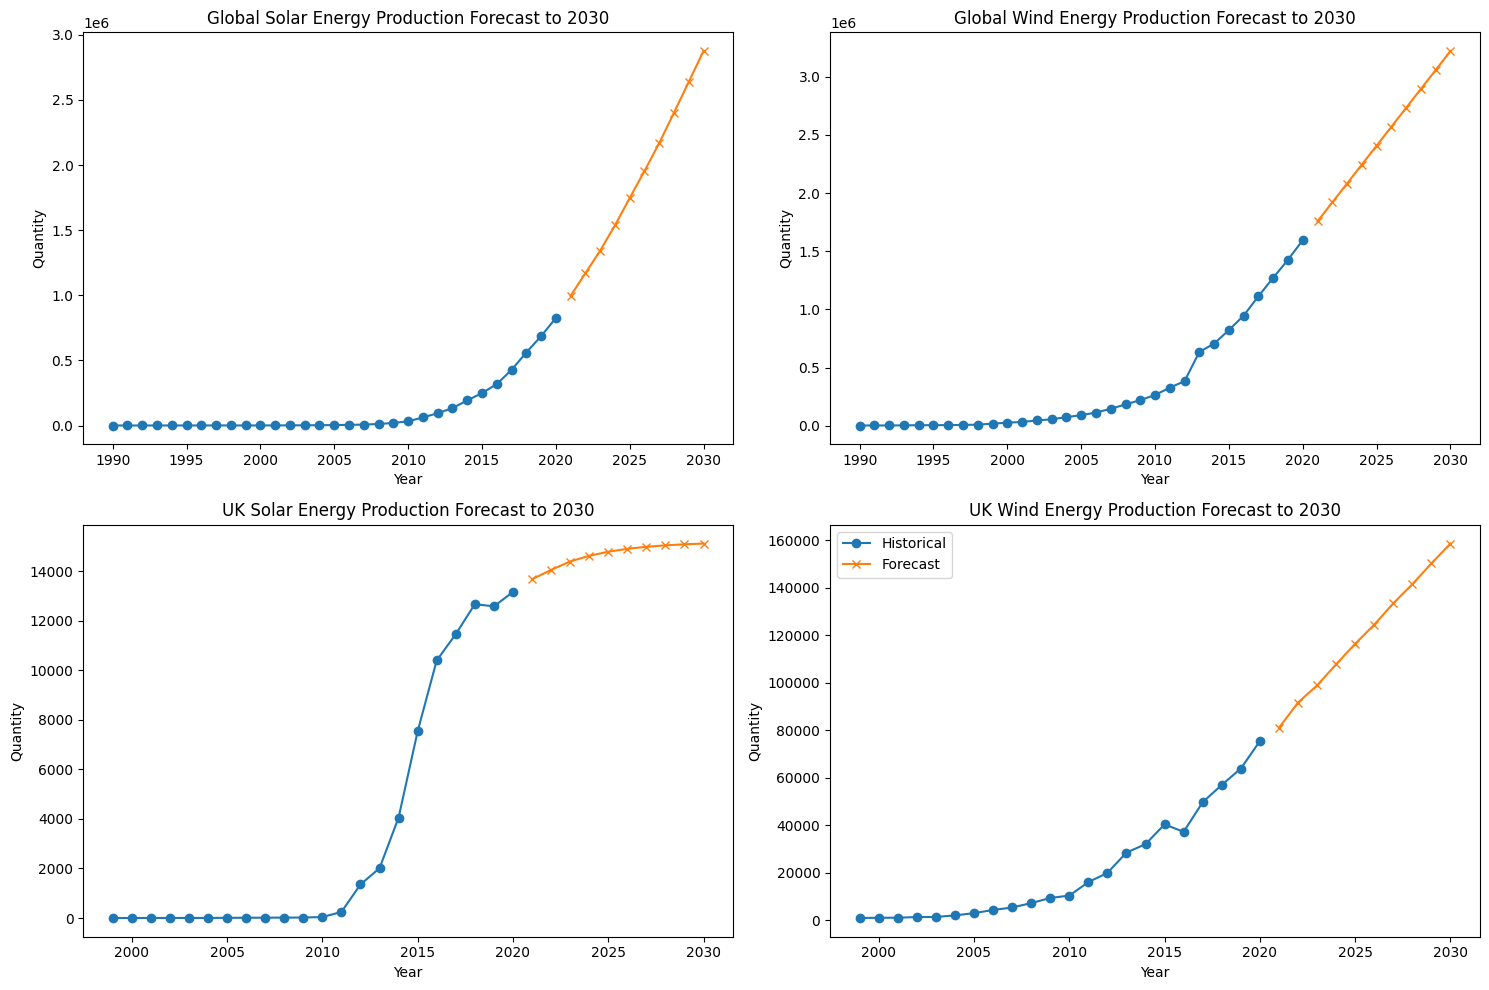

In [4]:
# Defining a forescast year
forescast_year = 2030

# Defining a function to fit and forecast using ARIMA
def forecast_arima(series, steps):
    model = ARIMA(series, order=(5,1,0))  # ARIMA model with (p,d,q) parameters
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=int(steps))
    return forecast

# Filtering the data to include only until the year 2020
data_until_2020 = data[data['Year'] <= 2020]

# Grouping the data globally until 2020
grouped_data_until_2020 = data_until_2020.groupby('Year').sum(numeric_only=True)

# Filtering the data for the UK until 2020
uk_data_until_2020 = data_until_2020[data_until_2020['Country or Area'] == 'United Kingdom']
uk_solar_until_2020 = uk_data_until_2020.groupby('Year')['Quantity_solar'].sum(numeric_only=True)
uk_wind_until_2020 = uk_data_until_2020.groupby('Year')['Quantity_wind'].sum(numeric_only=True)

# Prepare the data for forecasting
global_solar_until_2020 = grouped_data_until_2020['Quantity_solar']
global_wind_until_2020 = grouped_data_until_2020['Quantity_wind']

# Number of years for the forecast (2021 to 2030)
current_data = data_until_2020['Year'].max()
forecast_years = forescast_year - current_data

# Making the global and UK forecasts
global_solar_forecast_2030 = forecast_arima(global_solar_until_2020, forecast_years)
global_wind_forecast_2030 = forecast_arima(global_wind_until_2020, forecast_years)
uk_solar_forecast_2030 = forecast_arima(uk_solar_until_2020, forecast_years)
uk_wind_forecast_2030 = forecast_arima(uk_wind_until_2020, forecast_years)

# Creating a range of years for the forecast
forecast_years_range_2030 = np.arange(current_data + 1, forescast_year +1)

# Plotting the forecasts
plt.figure(figsize=(15, 10))

# Predicting Global Solar Energy
plt.subplot(2, 2, 1)
plt.plot(global_solar_until_2020.index, global_solar_until_2020, label='Historical', marker='o')
plt.plot(forecast_years_range_2030, global_solar_forecast_2030, label='Forecast', marker='x')
plt.title('Global Solar Energy Production Forecast to 2030')
plt.xlabel('Year')
plt.ylabel('Quantity')

# Predicting Global Wind Energy
plt.subplot(2, 2, 2)
plt.plot(global_wind_until_2020.index, global_wind_until_2020, label='Historical', marker='o')
plt.plot(forecast_years_range_2030, global_wind_forecast_2030, label='Forecast', marker='x')
plt.title('Global Wind Energy Production Forecast to 2030')
plt.xlabel('Year')
plt.ylabel('Quantity')

# Predicting UK Solar Energy
plt.subplot(2, 2, 3)
plt.plot(uk_solar_until_2020.index, uk_solar_until_2020, label='Historical', marker='o')
plt.plot(forecast_years_range_2030, uk_solar_forecast_2030, label='Forecast', marker='x')
plt.title('UK Solar Energy Production Forecast to 2030')
plt.xlabel('Year')
plt.ylabel('Quantity')

# Predicting UK Wind Energy
plt.subplot(2, 2, 4)
plt.plot(uk_wind_until_2020.index, uk_wind_until_2020, label='Historical', marker='o')
plt.plot(forecast_years_range_2030, uk_wind_forecast_2030, label='Forecast', marker='x')
plt.title('UK Wind Energy Production Forecast to 2030')
plt.xlabel('Year')
plt.ylabel('Quantity')

plt.tight_layout()
plt.legend()
plt.show()

<div style="background-color: #f5f5dc; color: black;">

Based on the forecast graphs for global solar and wind energy production, as well as for the UK, here are some potential conclusions:

1. **Continuous Growth**: Both solar and wind energy show a continued increase in production up to 2030, indicating a positive trend in the adoption of renewable energies.

2. **Acceleration in Wind Energy Production**: The growth in wind energy production appears to be more pronounced than that of solar energy, especially at the global level, which may suggest larger investments or technological advancements favoring this energy source.

3. **Solar Energy in the UK**: The forecast shows a steady increase, but not as steep as wind energy, which could reflect geographical limitations or energy policy constraints affecting the expansion of solar energy in the UK.

4. **Wind Energy in the UK**: The UK seems to be on track for a significant increase in wind energy production, suggesting that the country could be strengthening its infrastructure and capacity in this particular area of renewable energy.

5. **Energy Investments and Policies**: The projected growth in both forms of renewable energy suggests a scenario where investments and policies continue to support the transition to renewable energies.

6. **Challenges and Opportunities**: While the graphs indicate a positive trajectory, they also highlight the need for ongoing planning to address the challenges of integrating renewable energies into the power grid, as well as opportunities for innovation and technological development.

</div>

<div style="background-color: lightgreen; border-radius: 10px; text-align: center;">
  <h1 style="font-weight: bold; color: black;">
Energy Clustering Analysis</h1>
</div>

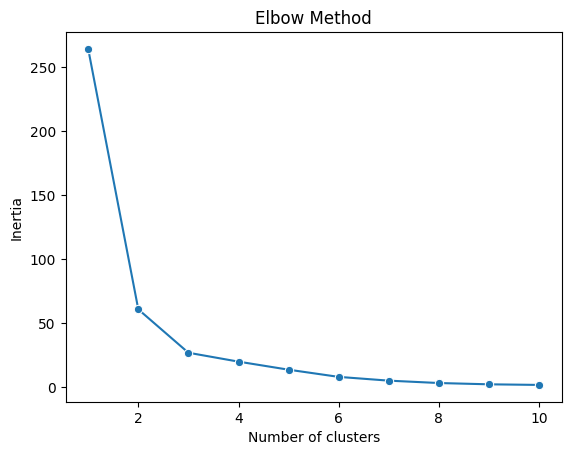

In [5]:
# Grouping the data by country and calculating the total sum for solar and wind energy
energy_data_by_country = data.groupby('Country or Area').sum().drop(columns='Year')

# Normalizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(energy_data_by_country)

# Using the Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Correcting the call for sns.lineplot
sns.lineplot(x=range(1, 11), y=inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


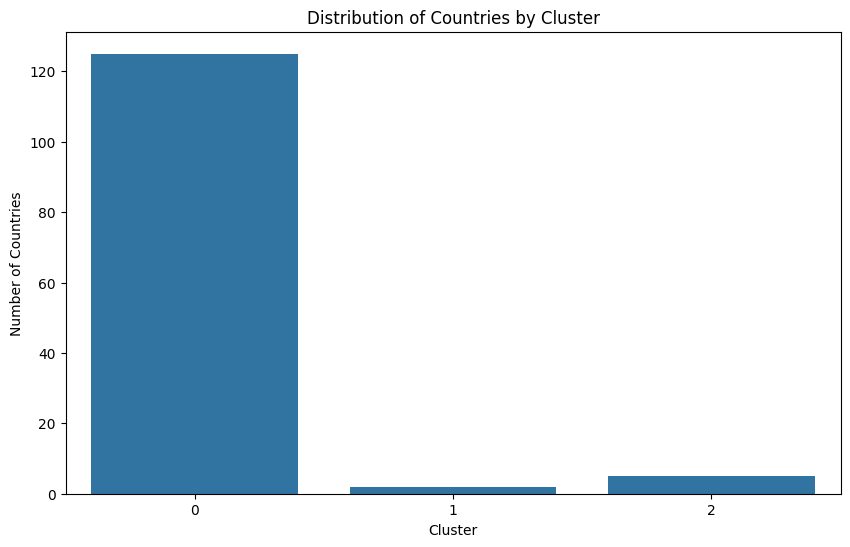

In [6]:
# Choosing 3 clusters based on the Elbow graph
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Adding the cluster labels back to the original data
energy_data_by_country['Cluster'] = clusters

# Visualizing the clusters with a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=energy_data_by_country)
plt.title('Distribution of Countries by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.show()

In [7]:
# Retrieving the first countries from each cluster for inspection
clustered_countries = energy_data_by_country.reset_index().groupby('Cluster')['Country or Area'].apply(list)
clustered_countries

# Creating a more presentable table, ensuring each list of countries is a separate column in the DataFrame
max_countries = max(clustered_countries.apply(len))
clustered_countries_padded = clustered_countries.apply(
    lambda x: x + [''] * (max_countries - len(x))
)

# Converting the lists into a DataFrame
clustered_countries_df = pd.DataFrame(clustered_countries_padded.tolist(), index=clustered_countries.index)

# Transposing the dataframe to have clusters as columns
clustered_countries_df = clustered_countries_df.transpose()

# Renaming the columns to the cluster numbers
clustered_countries_df.columns = [f'Cluster {i}' for i in clustered_countries_df.columns]

clustered_countries_df.head()  # Showing only the first few lines to avoid a very long output

,Cluster 0,Cluster 1,Cluster 2
0,Algeria,China,Germany
1,Argentina,United States,India
2,Armenia,,Italy
3,Aruba,,Japan
4,Australia,,Spain


<div style="background-color: #f5f5dc; color: black;">

1. **Elbow Method Graph Analysis**:
   - The Elbow Method graph suggests that after three clusters, the decrease in inertia becomes marginal, indicating that three clusters are a good balance between complexity and explaining variance within the data.
   - This implies that the global energy market can be roughly divided into three distinct groups based on the adoption and production of wind and solar energy.

2. **Cluster Distribution Analysis**:
   - The majority of countries fall into a single cluster (Cluster 0), suggesting that most countries have a similar energy profile when it comes to wind and solar energy production.
   - There are significantly fewer countries in Clusters 1 and 2, indicating that these clusters represent countries with more distinctive energy production profiles in terms of wind and solar energy.

3. **Inspection of Clustered Countries**:
   - Countries in Cluster 0 might be those with lower overall production of wind and solar energy.
   - Cluster 1 includes countries like China and the United States, which are likely to be high producers of wind and solar energy.
   - Cluster 2 contains countries like Germany, India, Italy, Japan, and Spain, which are also known for substantial renewable energy production but might have different energy mixes or adoption rates compared to Cluster 1.

4. **Implications for Renewable Energy Strategy**:
   - Countries in Cluster 0 may represent potential targets for increased technical assistance and investment in renewable energy infrastructure.
   - Clusters 1 and 2 may consist of countries that could act as models for renewable energy adoption or could be in a position to export technology and expertise.

5. **Strategic Development**:
   - The BCI could use these insights to tailor their blockchain-based technical assistance projects, focusing on different strategies for each cluster group.
   - For countries in Cluster 0, the focus could be on initiating renewable energy adoption, whereas for countries in Clusters 1 and 2, the focus could be on optimization and technological advancement.

This clustering approach provides a nuanced understanding of the global renewable energy landscape, which is vital for strategic planning and decision-making within the BCI and for advising partner countries on sustainable energy projects.

</div>

<div style="background-color: lightgreen; border-radius: 10px; text-align: center;">
  <h1 style="font-weight: bold; color: black;">
Substantial Changes in Categories</h1>
</div>

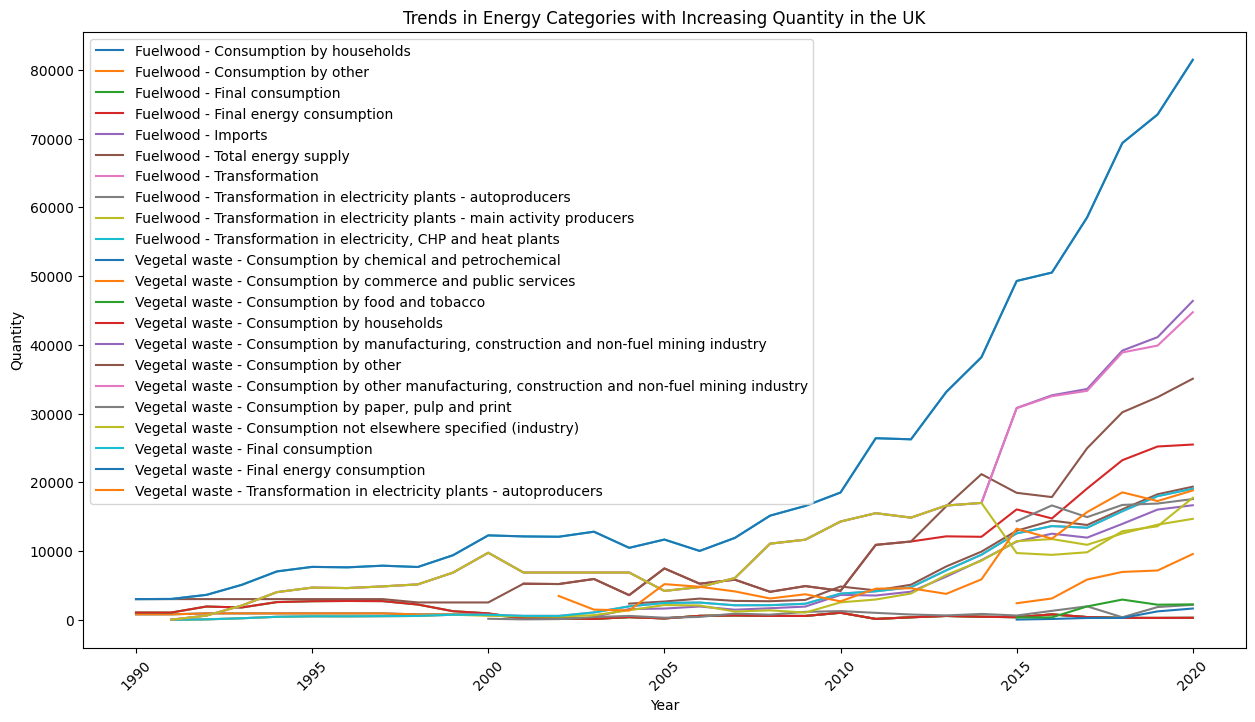

In [11]:
uk_data = combined_df[combined_df['Country or Area']=='United Kingdom']

# Fetching the unique 'Commodity - Transaction' categories within the UK dataset
uk_data['Commodity - Transaction'].unique()
categories_trends = uk_data.groupby(['Commodity - Transaction', 'Year']).agg({'Quantity': 'sum'}).reset_index()

# Filtering the data to focus only on UK categories that have seen an increase in recent years
# We will consider the increase in the total quantity over the most recent years available in the dataset

# Finding the most recent year in the data
latest_year = uk_data['Year'].max()

# Calculating the sum of quantity by category for the most recent year and the previous year
latest_year_data = uk_data[uk_data['Year'] == latest_year].groupby('Commodity - Transaction')['Quantity'].sum()
previous_year_data = uk_data[uk_data['Year'] == latest_year - 1].groupby('Commodity - Transaction')['Quantity'].sum()

# Identifying categories that have shown an increase
increasing_categories = latest_year_data[latest_year_data > previous_year_data]

# Filtering the trends to include only categories with an increase
increasing_trends = categories_trends[categories_trends['Commodity - Transaction'].isin(increasing_categories.index)]

# Plotting the line chart for categories with an increasing trend
plt.figure(figsize=(15, 8))
for category in increasing_trends['Commodity - Transaction'].unique():
    category_data = increasing_trends[increasing_trends['Commodity - Transaction'] == category]
    plt.plot(category_data['Year'], category_data['Quantity'], label=category)

plt.title('Trends in Energy Categories with Increasing Quantity in the UK')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.show()



<div style="background-color: #f5f5dc; color: black;">

1. **Substantial Increase in Certain Categories**: Some categories, particularly related to fuelwood and vegetal waste, show a significant increase in quantity over time. This suggests a growing trend in the utilization of these energy sources in the UK.

2. **Rapid Growth in Recent Years**: The sharp upward trajectory in the last few years for categories like "Fuelwood - Consumption by households" indicates a rapid growth in domestic use of fuelwood. This could be due to a shift towards more renewable sources of energy or an increase in household energy needs.

3. **Diverse Energy Consumption Patterns**: There are multiple categories with different consumption patterns, reflecting the diverse nature of the energy mix in the UK. It shows the complexity of energy consumption and the need for tailored energy policies.

4. **Potential Shift Towards Renewable Energy**: The increased consumption of vegetal waste and fuelwood might imply a deliberate move towards more sustainable and renewable energy sources, which aligns with global trends in energy sustainability.

5. **Industry and Public Service Trends**: Categories like "Vegetal waste - Consumption by commerce and public services" show a gradual increase, which may indicate a growing recognition of the importance of sustainable waste management and energy practices in these sectors.

6. **Household Energy Trends**: Steady growth in "Fuelwood - Consumption by households" and "Vegetal waste - Consumption by households" suggests changes in household energy consumption behavior, possibly driven by economic factors or environmental awareness.

Overall, the graph points to a clear trend of increasing utilization of certain types of biofuels (fuelwood and vegetal waste) in the UK, highlighting the potential shift in energy production and consumption towards more sustainable practices. It also underscores the need for continuous monitoring of these trends for effective policy making and energy management.

</div>